## Question 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_Preference(H):
    exp = np.exp(H)
    return exp / np.sum(exp)

In [3]:
# baseline, Rt_bar is the average of rewards including Rt
def ten_armed_testbed_gradient_with_baseline(eps):
    # Initialize
    arms = 10
    alpha = eps
    timestamps = 1000
    episodes = 2000
    optimal_arm = [0 for i in range(0,timestamps)]
    list_arms = [i for i in range(0,arms)]
    
    for episode in range(0, episodes):
        # Step 1 : assign q*(a) for all arms a
        true_q = np.random.normal(4,1,10)

        #Step 2 : simulate 10-arm bandit for 1000 timestamps
        Ht = [0.0 for i in range(0,arms)]
        Pit = [0.0 for i in range(0,arms)]
        
        av_rewards = 0
        n = 0

        for iterations in range(0, timestamps):
            # Step 0 : Get optimal arm
            true_At = np.argmax(true_q)
            # Step 1 : Choose arm At
            pit = calc_Preference(Ht)
            At = np.random.choice(list_arms,p=pit)
            # Step 2 : Receive reward
            Rt = np.random.normal(true_q[At],1)
            # Step 3 : Update n and rewards
            n += 1
            av_rewards = av_rewards + (Rt - av_rewards)/n
            #Step 4 : Update Action Preferences
            Ht[At] = Ht[At] + alpha * (Rt - av_rewards) * (1 - pit[At])
            for i in range(0,arms):
                if At!=i:
                    Ht[i] = Ht[i] - alpha * (Rt - av_rewards) * pit[i]
            # Step 5 : Update optimal_action
            if At == true_At:
                optimal_arm[iterations] += 1
                
                
    for iteration in range(0, timestamps):
        optimal_arm[iteration] = (optimal_arm[iteration]*100)/episodes
        
    return optimal_arm

In [4]:
def ten_armed_testbed_gradient_without_baseline(eps):
    # Initialize
    arms = 10
    alpha = eps
    timestamps = 1000
    episodes = 2000
    optimal_arm = [0 for i in range(0,timestamps)]
    list_arms = [i for i in range(0,arms)]
    
    for episode in range(0, episodes):
        # Step 1 : assign q*(a) for all arms a
        true_q = np.random.normal(4,1,10)

        #Step 2 : simulate 10-arm bandit for 1000 timestamps
        Ht = [0.0 for i in range(0,arms)]
        Pit = [0.0 for i in range(0,arms)]

        for iterations in range(0, timestamps):
            # Step 0 : Get optimal arm
            true_At = np.argmax(true_q)
            # Step 1 : Choose arm At
            pit = calc_Preference(Ht)
            At = np.random.choice(list_arms,p=pit)
            # Step 2 : Receive reward
            Rt = np.random.normal(true_q[At],1)
            #Step 3 : Update Action Preferences
            Ht[At] = Ht[At] + alpha * (Rt) * (1 - pit[At])
            for i in range(0,arms):
                if At!=i:
                    Ht[i] = Ht[i] - alpha * (Rt) * pit[i]
            # Step 5 : Update optimal_action
            if At == true_At:
                optimal_arm[iterations] += 1
                
                
    for iteration in range(0, timestamps):
        optimal_arm[iteration] = (optimal_arm[iteration]*100)/episodes
        
    return optimal_arm

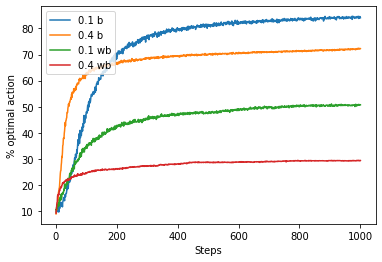

In [5]:
timestamps = 1000
time = [i for i in range(1,timestamps+1)]

optimal_arm1 = ten_armed_testbed_gradient_with_baseline(0.1)
optimal_arm2 = ten_armed_testbed_gradient_with_baseline(0.4)

optimal_arm3 = ten_armed_testbed_gradient_without_baseline(0.1)
optimal_arm4 = ten_armed_testbed_gradient_without_baseline(0.4)

# plotting figure 1
plt.figure()
plt.plot(time, optimal_arm1, label='0.1 b') #alpha = 0.1, with baseline
plt.plot(time, optimal_arm2, label='0.4 b') #alpha = 0.4, with baseline
plt.plot(time, optimal_arm3, label='0.1 wb') #alpha = 0.1, without baseline
plt.plot(time, optimal_arm4, label='0.4 wb') #alpha = 0.4, without baseline
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()